<a href="https://colab.research.google.com/github/erivetna87/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_114_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# ASSIGNMENT

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


#Creating a dataframe to crosstab
df = pd.DataFrame({'animal': ['cat','cat','dog','cat','dog','cat','dog','dog'],
                  'country': ['USA', 'Canada', 'Canada', 'Canada', 'USA', 'Canada', 'USA', 'USA'],
                  'gender': ['male','female','male','male','male','male','female','female']})

df.head(10)

,animal,country,gender
0,cat,USA,male
1,cat,Canada,female
2,dog,Canada,male
3,cat,Canada,male
4,dog,USA,male
5,cat,Canada,male
6,dog,USA,female
7,dog,USA,female


In [0]:

pd.crosstab(df['animal'],df['country'])

country,Canada,USA
animal,,
cat,3,1
dog,1,3


In [0]:
pd.crosstab(df['country'], df['gender'])

gender,female,male
country,,
Canada,1,3
USA,2,2


In [0]:
#crosstab with normalize parameter to convert column values into percentages
pd.crosstab(df['country'], df['gender'], normalize='columns')

gender,female,male
country,,
Canada,0.333333,0.6
USA,0.666667,0.4


In [0]:
#crosstab with normalize parameter to convert row values into percentages
pd.crosstab(df['country'], df['gender'], normalize='index')

gender,female,male
country,,
Canada,0.25,0.75
USA,0.50,0.50


In [0]:
#crosstab with normalize parameter set to True to convert all values to percetnages

pd.crosstab(df['country'], df['gender'], normalize=True)

gender,female,male
country,,
Canada,0.125,0.375
USA,0.250,0.250


In [0]:
pd.crosstab(df['country'], [df['gender'], df['animal']])

gender  female     male    
animal     cat dog  cat dog
country                    
Canada       1   0    2   1
USA          0   2    1   1

In [0]:
#crosstab with margins parameter set to True to obtain subtotal
crosstab = pd.crosstab(df['country'], [df['gender'], df['animal']], margins=True)
crosstab

gender  female     male     All
animal     cat dog  cat dog    
country                        
Canada       1   0    2   1   4
USA          0   2    1   1   4
All          1   2    3   2   8

In [0]:
#crosstab with stacking gender & animal
crosstab = pd.crosstab(df['country'],[df['gender'],df['animal']],margins=True).T
crosstab

country        Canada  USA  All
gender animal                  
female cat          1    0    1
       dog          0    2    2
male   cat          2    1    3
       dog          1    1    2
All                 4    4    8

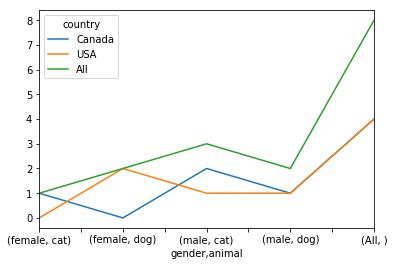

In [0]:
crosstab.plot()

In [0]:
# !wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-08-08 21:41:28--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.56M   907KB/s    in 24s     

2019-08-08 21:41:53 (901 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22606280]



In [0]:
# !unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [0]:
# !head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4404.61","4404.61","1701.34","1701.34","1195.39","505.95","0.0","0.0","0.0","Jul-2019","190.21","Aug-2019","Jul-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [0]:
#Creating Pandas DataFrame skipping row 0 due to URL link. Skipping footer to omit Total amount funded in policy
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,0.0,Jul-2019,324.23,Jul-2019,Jul-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,0.0,Jul-2019,155.68,Jul-2019,Jul-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (16-30 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jul-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,

In [0]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,521.41,0.0,0.0,0.0,Dec-2018,797.53,NaN,Nov-2018,0,NaN,1,Individual,NaN,NaN,NaN,0,0,259658,4,2,3,3,6.0,18149,86.0,4,6,12843,56.0,51500,2,2,5,11,21638.0,26321.0,44.1,0,0,12.0,397,4,4,6,5.0,22.0,4.0,22.0,0,4,5,7,14,3,9,19,5,12,0.0,0,0,7,96.4,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,7902.84,7902.84,3112.50,3112.50,2097.16,1015.34,0.0,0.0,0.0,Jul-2019,346.76,Aug-2019,Jul-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,155,77424,0,1,0,0,34.0,200,10.0,1,1,1866,42.0,15200,2,0,0,2,7039.0,4537.0,50.1,0,0,34.0,434,11,11,3,11.0,6.0,17.0,6.0,0,3,5,5,6,1,8,11,5,11,0.0,0,0,1,73.3,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3932.69,3932.69,1524.70,1524.70,1067.31,457.39,0.0,0.0,0.0,Jul-2019,169.83,Aug-2019,Jul-2019,0,NaN,1,Individual,NaN,

In [0]:
#Obtaining df null values for exploratory data purposes 
df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128409
deferral_term                                 128409
hardship_amount                               128409
hardship_start_date                           128409
hardship_end_date                             128409
payment_plan_start_date                       128409
hardship_length                               128409
orig_projected_additional_accrued_interest    128409
hardship_loan_status                          128409
hardship_reason                               128409
hardship_payoff_balance_amount                128409
hardship_last_payment_amount                  128409
hardship_type                                 128409
hardship_status                               128409
settlement_percentage                         

In [0]:
#Dropping columns that provide no value in our analysis due to null values
df = df.drop(columns=['id', 'member_id', 'desc', 'url'], axis=0) 


In [0]:
type(df['int_rate'])

pandas.core.series.Series

In [0]:
df['int_rate']

0          10.33%
1          23.40%
2          17.97%
3          20.89%
4          23.40%
5          11.80%
6          12.98%
7          13.56%
8          18.94%
9          13.56%
10         19.92%
11         17.97%
12         26.31%
13         14.47%
14         23.40%
15         23.40%
16         20.89%
17         26.31%
18         14.47%
19         15.02%
20         14.47%
21         15.02%
22         16.14%
23         11.31%
24         27.27%
25         11.31%
26         23.40%
27         10.33%
28         18.94%
29         11.31%
30         16.14%
31         12.98%
32         11.80%
33         10.72%
34         12.98%
35         11.80%
36         14.47%
37         10.72%
38         11.80%
39         23.40%
40         20.89%
41         19.92%
42         10.33%
43          6.46%
44         14.47%
45         11.31%
46         17.97%
47         15.02%
48         17.97%
49         18.94%
50         16.91%
51         11.80%
52         14.47%
53         11.31%
54         14.47%
55        

In [0]:
int_rate = '15.02%'
int_rate[:-1]

'15.02'

In [0]:
#List splicing to get last 2 values in the list
nt_list = ['15.02%', '13.56%', '16.91%']
int_list[:2]

['15.02%', '13.56%']

In [0]:
int_rate.strip('%')

'15.02'

In [0]:
type(int_rate.strip('%'))


str

In [0]:
type(float(int_rate.strip('%')))

float

In [0]:
def remove_percent_to_float(string):
  return float(string.strip('%'))

In [0]:
int_list = ['15.02%', '13.56%', '16.91%']

[remove_percent_to_float(item) for item in int_list]

#messier alternative to creating a list
# for i in int_list:
#   int_list_float = []
#   int_float = remove_percent_to_float(i)
#   int_list_float.append(int_float)
#   return int_list_float #how is this outside the function?


  

In [0]:
#Not sure why I have to cast the df['int_rate'] column as a string\
#when it wasn't necessary in Ryan's lecture. 
df['int_rate'] = df['int_rate'].astype(str).apply(remove_percent_to_float)


In [0]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
df['emp_title'].value_counts(dropna=False).reset_index().shape

(43893, 2)

In [0]:
df.describe(exclude='number')

In [0]:
df['emp_title'].isnull().sum()

In [0]:
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

def clean_title(item):
  if isinstance(item, str):
    return item.strip().title()
  else:
    return "Unknown"

[clean_title(item) for item in examples]

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)

df.head()

In [0]:
df['emp_title'].value_counts(dropna=False).head(20)

In [0]:
df['emp_title'].describe(exclude='number')

In [0]:
df['emp_title'].nunique()

In [0]:
df.emp_title_manager = True
print(df.emp_title_manager)

In [0]:
df['emp_title_manager'] = True
print(df['emp_title_manager'])

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains("Manager")

df.head()

In [0]:
condition = (df['emp_title_manager'] == True)
managers = df[condition]
print(managers.shape)
managers.head()

In [0]:
managers = df[df['emp_title'].str.contains('Manager')]
print(managers.shape)
managers.head()

In [0]:
plebians = df[df['emp_title_manager'] == False]
print(plebians.shape)
plebians.head()

In [0]:
managers['int_rate'].hist(bins=20);

In [0]:
plebians['int_rate'].hist(bins=20);

In [0]:
managers['int_rate'].plot.density()

In [0]:
plebians['int_rate'].plot.density()

In [0]:
managers['int_rate'].mean()

In [0]:
plebians['int_rate'].mean()

In [0]:
df['issue_d']
df['issue_d'].describe()

In [0]:
df['issue_d'].value_counts()

In [0]:
df.dtypes

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [0]:
df['issue_d'].head().values

In [0]:
df.dtypes

In [0]:
df['issue_d'].dt.year

In [0]:
df['issue_d'].dt.month

In [0]:
df['issue_year'] = df['issue_d'].dt.year

In [0]:
df['issue_month'] = df['issue_d'].dt.month
df.head()

In [0]:
[col for col in df if col.endswith('_d')]

In [0]:
df['earliest_cr_line'].head()

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], 
                                        infer_datetime_format=True)

In [0]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [0]:
df['days_from_earliest_credit_to_issue'].describe()

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01